<a href="https://colab.research.google.com/github/Somya1911/NYC-Urban-Mobility-and-Accomodation-Trends/blob/main/somya_khatri_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**NYC’s Urban Mobility and Accommodation Trends using the Airbnb open data and trip data

by Somya Khatri

##Objective:
To analyze New York City's urban mobility and accommodation trends by leveraging Airbnb open data and various trip data sources, aiming to understand the interplay between short-term lodging preferences and citywide transportation patterns. This study seeks to provide insights into seasonal and geographic variations in accommodation and mobility, and to assess the impact of these trends on urban planning and policy development.

##Overview
**Airbnb Open Data**

1) What is the data? Where is it from? Provide a URL.

As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City. The following Airbnb activity is included in this New York dataset:Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

Original source: http://insideairbnb.com/explore/

https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

2) Is it a topic that interests you?

The topic of analyzing Airbnb New User Bookings alongside Uber Pickups in New York City offers a fascinating intersection of urban mobility and accommodation trends like Urban Transportation and Accommodation Dynamics, Consumer Behavior Insights, and Technological Integration in Urban Living.

3) What preliminary questions do you have of the data?

Is there a concentration of Airbnb properties in certain areas?How does the distribution relate to tourist attractions, public transport, or other amenities?

4) What is interesting about the data?

There is a data dictionary that provides a concise guide to understanding and using the data. The data is very in-depth with over 36 columns, therefore more scope for exploration.

5) What do you think will interest others about these data?

Travel enthusiasts and industry professionals would be interested in how Airbnb is reshaping lodging choices in one of the world's most visited cities.

6) What technologies, platforms, or skills will you have to learn or brush up on?

Since it is a very large dataset, working on it would require a lot of data cleaning and subsetting, therefore I will have to brush up on those skills.

**Uber/lyft trip data**

1) What is the data? Where is it from? Provide a URL.

Kaggle link: https://www.kaggle.com/datasets/jeffsinsel/nyc-fhvhv-data/data?select=fhvhv_tripdata_2019-02.parquet

Original source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

The Uber Ride Dataset for New York City contains detailed information about every Uber ride in the city.

2) Is it a topic that interests you?

The topic of analyzing Airbnb New User Bookings alongside Uber Pickups in New York City offers a fascinating intersection of urban mobility and accommodation trends like Urban Transportation and Accommodation Dynamics, Consumer Behavior Insights, and Technological Integration in Urban Living.

3) What preliminary questions do you have of the data?

How many trips occur on a daily, weekly, or monthly basis?

Are there observable patterns or trends in trip frequency (e.g., time of day, day of the week, seasonality)

4) What is interesting about the data?

The data includes rich geospatial information that can be used to conduct detailed analyses of travel patterns within different neighborhoods, helping to understand urban dynamics more comprehensively.

5) What do you think will interest others about these data?

The dataset is a prime example of how technology, especially mobile and app-based services, is reshaping traditional industries, which can be intriguing for those interested in tech-driven business models.

6) What technologies, platforms, or skills will you have to learn or brush up on?

Exploring options to convert parquet data to csv using python.

#D1: Library imports#

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Fetch the data

In [ ]:
!kaggle datasets download -d arianazmoudeh/airbnbopendata #Airbnb Open Data


 86% 9.00M/10.5M [00:00<00:00, 91.9MB/s]
100% 10.5M/10.5M [00:00<00:00, 99.2MB/s]


In [ ]:
!kaggle datasets download -d anandaramg/taxi-trip-data-nyc #NYC Taxi Trip Data

  0% 0.00/1.63M [00:00<?, ?B/s]
100% 1.63M/1.63M [00:00<00:00, 152MB/s]


In [ ]:
!unzip /content/taxi-trip-data-nyc.zip #Trip Data

Archive:  /content/taxi-trip-data-nyc.zip
  inflating: taxi_tripdata.csv       
  inflating: trip_data_dictionary.pdf  


In [ ]:
!unzip /content/airbnbopendata.zip #Airbnb Open Data

Archive:  /content/airbnbopendata.zip
  inflating: Airbnb_Open_Data.csv    


Import the unzipped .csv files to dataframes using pandas

In [ ]:
airbnb_data = pd.read_csv("/content/Airbnb_Open_Data.csv", header=0, low_memory=False) #Airbnb Open Data

In [ ]:
trip_data = pd.read_csv("/content/taxi_tripdata.csv", header=0, low_memory=False )

#D2: Data pre-processing

# **Airbnb** **Dataset**

Since the datasets we are dealing with are very huge in size, we are first going to subset the dataset, to only include rows and columns that are relevant for the analysis. By going through the datacard for the three datasets

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
for i in airbnb_data.columns:
    null_rate = airbnb_data[i].isna().sum() / len(airbnb_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

NAME null rate: 0.24%
host_identity_verified null rate: 0.28%
host name null rate: 0.4%
neighbourhood group null rate: 0.03%
neighbourhood null rate: 0.02%
lat null rate: 0.01%
long null rate: 0.01%
country null rate: 0.52%
country code null rate: 0.13%
instant_bookable null rate: 0.1%
cancellation_policy null rate: 0.07%
Construction year null rate: 0.21%
price null rate: 0.24%
service fee null rate: 0.27%
minimum nights null rate: 0.4%
number of reviews null rate: 0.18%
last review null rate: 15.49%
reviews per month null rate: 15.48%
review rate number null rate: 0.32%
calculated host listings count null rate: 0.31%
availability 365 null rate: 0.44%
house_rules null rate: 50.81%
license null rate: 100.0%


Drop Columns house_rules and license which are 50% and 100% null respectively

In [ ]:
airbnb_data = airbnb_data.drop(['house_rules', 'license'], axis=1)

In [ ]:
airbnb_data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... Construction year  price  \
0  40.64749 -73.97237  United States  ...            2020.0  $966    
1  40.75362 -73.98377  United States  ...            2007.0  $142    
2  40.80902 -73.94190  United States  ...            2005.0  $620    
3  40.68514 -73.95976  United States  ...            2005.0  $368    
4  40.79851 -73.94399  United States  ...            2009.0  $204    

  service fee minimum nights  number of reviews last review reviews per month  \
0       $193            10.0                9.0  10/19/2021              0.21   
1        $28            30.0               45.0   5/21/2022              0.38   
2       $124             3.0                0.0         NaN               NaN   
3        $74            30.0              270.0    7/5/2019              4.64   
4        $41            10.0                9.0  11/19/2018              0.10   

   review rate number  calculated host listings count availability 365  
0                 4.0                             6.0            286.0  
1                 4.0                             2.0            228.0  
2                 5.0                             1.0            352.0  
3                 4.0                             1.0            322.0  
4                 3.0                             1.0            289.0  

[5 rows x 24 columns]

In [ ]:
airbnb_data.shape

(102599, 24)

In [ ]:
airbnb_data['reviews per month'] = airbnb_data['reviews per month'].fillna(airbnb_data['reviews per month'].mode()[0])  # Replace with mode

In [ ]:
for i in airbnb_data.columns:
    null_rate = airbnb_data[i].isna().sum() / len(airbnb_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

NAME null rate: 0.24%
host_identity_verified null rate: 0.28%
host name null rate: 0.4%
neighbourhood group null rate: 0.03%
neighbourhood null rate: 0.02%
lat null rate: 0.01%
long null rate: 0.01%
country null rate: 0.52%
country code null rate: 0.13%
instant_bookable null rate: 0.1%
cancellation_policy null rate: 0.07%
Construction year null rate: 0.21%
price null rate: 0.24%
service fee null rate: 0.27%
minimum nights null rate: 0.4%
number of reviews null rate: 0.18%
last review null rate: 15.49%
review rate number null rate: 0.32%
calculated host listings count null rate: 0.31%
availability 365 null rate: 0.44%


Converting 'last review' column to pandas 'datetime' column.

In [ ]:
airbnb_data['last review'] = pd.to_datetime(airbnb_data['last review'])

In [ ]:
airbnb_data['last review'] = airbnb_data['last review'].fillna(airbnb_data['last review'].mode()[0])  # Replace with mode

In [ ]:
for i in airbnb_data.columns:
    null_rate = airbnb_data[i].isna().sum() / len(airbnb_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

NAME null rate: 0.24%
host_identity_verified null rate: 0.28%
host name null rate: 0.4%
neighbourhood group null rate: 0.03%
neighbourhood null rate: 0.02%
lat null rate: 0.01%
long null rate: 0.01%
country null rate: 0.52%
country code null rate: 0.13%
instant_bookable null rate: 0.1%
cancellation_policy null rate: 0.07%
Construction year null rate: 0.21%
price null rate: 0.24%
service fee null rate: 0.27%
minimum nights null rate: 0.4%
number of reviews null rate: 0.18%
review rate number null rate: 0.32%
calculated host listings count null rate: 0.31%
availability 365 null rate: 0.44%


Since the focus of the analysis is on geographical positioning, we will drop the rows with null 'neighbourhood group', 'neighbourhood', 'lat', 'long' and we will drop the 'Country' and 'Country Code' column since we already the know the data is for 'NYC' only so the value is going to be same for all the rows.

In [ ]:
airbnb_data.dropna(subset=['neighbourhood group', 'neighbourhood', 'lat', 'long'], inplace=True)


In [ ]:
for i in airbnb_data.columns:
    null_rate = airbnb_data[i].isna().sum() / len(airbnb_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

NAME null rate: 0.24%
host_identity_verified null rate: 0.27%
host name null rate: 0.39%
country null rate: 0.52%
country code null rate: 0.12%
instant_bookable null rate: 0.1%
cancellation_policy null rate: 0.07%
Construction year null rate: 0.2%
price null rate: 0.24%
service fee null rate: 0.27%
minimum nights null rate: 0.4%
number of reviews null rate: 0.18%
review rate number null rate: 0.32%
calculated host listings count null rate: 0.31%
availability 365 null rate: 0.43%


In [ ]:
airbnb_data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... Construction year  price  \
0  40.64749 -73.97237  United States  ...            2020.0  $966    
1  40.75362 -73.98377  United States  ...            2007.0  $142    
2  40.80902 -73.94190  United States  ...            2005.0  $620    
3  40.68514 -73.95976  United States  ...            2005.0  $368    
4  40.79851 -73.94399  United States  ...            2009.0  $204    

  service fee minimum nights  number of reviews last review reviews per month  \
0       $193            10.0                9.0  2021-10-19              0.21   
1        $28            30.0               45.0  2022-05-21              0.38   
2       $124             3.0                0.0  2019-06-23              0.03   
3        $74            30.0              270.0  2019-07-05              4.64   
4        $41            10.0                9.0  2018-11-19              0.10   

   review rate number  calculated host listings count availability 365  
0                 4.0                             6.0            286.0  
1                 4.0                             2.0            228.0  
2                 5.0                             1.0            352.0  
3                 4.0                             1.0            322.0  
4                 3.0                             1.0            289.0  

[5 rows x 24 columns]

Replace missing 'NAME' with 'unnamed', replace host_identity_verified with the mode value of the column, replace NaN 'host name' values with 'no name', replace missing 'instant_bookable' values with mode of the column, missing 'cancellation policy' with 'flexible', 'construction year' with mode value, 'price' with mode value, 'service fee' with mode value, 'minimum nights' with mode value,'number of reviews' with mode value, 'review rate number' with mode value, 'calculated host listings count' with mode value, 'availablility 365' with mode value.

In [ ]:
airbnb_data['NAME'] = airbnb_data['NAME'].fillna('no name')
airbnb_data['host_identity_verified'] = airbnb_data['host_identity_verified'].fillna(airbnb_data['host_identity_verified'].mode()[0])  # Replace with mode
airbnb_data['host name'] = airbnb_data['host name'].fillna('no name')
airbnb_data['instant_bookable'] = airbnb_data['instant_bookable'].fillna(airbnb_data['instant_bookable'].mode()[0])
airbnb_data['cancellation_policy'] = airbnb_data['cancellation_policy'].fillna('flexible')
airbnb_data['Construction year'] = airbnb_data['Construction year'].fillna(airbnb_data['Construction year'].mode()[0])
airbnb_data['price'] = airbnb_data['price'].fillna(airbnb_data['price'].mode()[0])
airbnb_data['service fee'] = airbnb_data['service fee'].fillna(airbnb_data['service fee'].mode()[0])
airbnb_data['minimum nights'] = airbnb_data['minimum nights'].fillna(airbnb_data['minimum nights'].mode()[0])
airbnb_data['number of reviews'] = airbnb_data['number of reviews'].fillna(airbnb_data['number of reviews'].mode()[0])
airbnb_data['review rate number'] = airbnb_data['review rate number'].fillna(airbnb_data['review rate number'].mode()[0])
airbnb_data['calculated host listings count'] = airbnb_data['calculated host listings count'].fillna(airbnb_data['calculated host listings count'].mode()[0])
airbnb_data['availability 365'] = airbnb_data['availability 365'].fillna(airbnb_data['availability 365'].mode()[0])


In [ ]:
# Check for NaN values in each column
nan_per_column = airbnb_data.isna().sum()
print("Number of NaN values in each column:\n", nan_per_column)

Number of NaN values in each column:
 id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64


In [ ]:
airbnb_data.drop(['country', 'country code'], axis=1, inplace=True)



In [ ]:
airbnb_data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           no name  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ... Construction year  price  \
0  40.64749 -73.97237             False  ...            2020.0  $966    
1  40.75362 -73.98377             False  ...            2007.0  $142    
2  40.80902 -73.94190              True  ...            2005.0  $620    
3  40.68514 -73.95976              True  ...            2005.0  $368    
4  40.79851 -73.94399             False  ...            2009.0  $204    

   service fee minimum nights number of reviews  last review  \
0        $193            10.0               9.0   2021-10-19   
1         $28            30.0              45.0   2022-05-21   
2        $124             3.0               0.0   2019-06-23   
3         $74            30.0             270.0   2019-07-05   
4         $41            10.0               9.0   2018-11-19   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2               0.03                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

# **Trip** **Dataset**

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
lookup_df = pd.read_csv('taxi_zones.csv')


In [ ]:
# Merge for Pick-Up Location using PULocationID
trip_data = pd.merge(trip_data, lookup_df[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')

# Rename columns for clarity
trip_data.rename(columns={'zone': 'PUZone', 'borough': 'PUBorough'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


In [ ]:
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='DOLocationID', right_on='LocationID', how='left')

In [ ]:
trip_data.rename(columns={'PUthe_geom': 'DOThe_geom'}, inplace=True)


In [ ]:
trip_data.drop('LocationID', axis=1, inplace=True)

In [ ]:
# Merge for Pick-Up Location using DOLocationID
trip_data = pd.merge(trip_data, lookup_df[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')

# Rename columns for clarity
trip_data.rename(columns={'zone': 'DOZone', 'borough': 'DOBorough'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)



In [ ]:
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='PULocationID', right_on='LocationID', how='left')

In [ ]:
trip_data.rename(columns={'the_geom': 'PUThe_geom'}, inplace=True)


In [ ]:
trip_data.drop('LocationID', axis=1, inplace=True)

In [ ]:
trip_data.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  ...  total_amount  payment_type  trip_type  \
0          6.0  ...          7.30           2.0        1.0   
1         42.0  ...         43.30           2.0        1.0   
2          6.5  ...         10.14           1.0        1.0   
3          6.5  ...          7.80           2.0        1.0   
4          7.0  ...          8.30           2.0        1.0   

   congestion_surcharge                PUZone  PUBorough  \
0                   0.0     East Harlem North  Manhattan   
1                   0.0      Hamilton Heights  Manhattan   
2                   0.0           Fort Greene   Brooklyn   
3                   0.0     East Harlem North  Manhattan   
4                   0.0  Central Harlem North  Manhattan   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
1                       NaN        NaN   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   

                                          PUThe_geom  
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...  
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...  
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...  
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...  
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...  

[5 rows x 26 columns]

In [ ]:
# Corrected code to drop multiple columns
trip_data.drop(['PUThe_geom', 'PUThe_geom'], axis=1, inplace=True)


In [ ]:
trip_data.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  ...  ehail_fee  improvement_surcharge  total_amount  \
0          6.0  ...        NaN                    0.3          7.30   
1         42.0  ...        NaN                    0.3         43.30   
2          6.5  ...        NaN                    0.3         10.14   
3          6.5  ...        NaN                    0.3          7.80   
4          7.0  ...        NaN                    0.3          8.30   

   payment_type  trip_type  congestion_surcharge                PUZone  \
0           2.0        1.0                   0.0     East Harlem North   
1           2.0        1.0                   0.0      Hamilton Heights   
2           1.0        1.0                   0.0           Fort Greene   
3           2.0        1.0                   0.0     East Harlem North   
4           2.0        1.0                   0.0  Central Harlem North   

   PUBorough                    DOZone  DOBorough  
0  Manhattan    Mott Haven/Port Morris      Bronx  
1  Manhattan                       NaN        NaN  
2   Brooklyn          Brooklyn Heights   Brooklyn  
3  Manhattan      Central Harlem North  Manhattan  
4  Manhattan  Washington Heights South  Manhattan  

[5 rows x 24 columns]

In [ ]:
# Merge the_geom for Pick-Up Location
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='PULocationID', right_on='LocationID', how='left')

# Rename the_geom column to differentiate it as Pick-Up Location geometry
trip_data.rename(columns={'the_geom': 'PUThe_geom'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


In [ ]:
# Merge the_geom for Drop-Off Location
trip_data = trip_data.merge(lookup_df[['LocationID', 'the_geom']], left_on='DOLocationID', right_on='LocationID', how='left')

# Rename the_geom column to differentiate it as Drop-Off Location geometry
trip_data.rename(columns={'the_geom': 'DOThe_geom'}, inplace=True)

# Optionally, drop the extra LocationID column if it's redundant
trip_data.drop('LocationID', axis=1, inplace=True)


In [ ]:
trip_data.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  ...  total_amount  payment_type  trip_type  \
0          6.0  ...          7.30           2.0        1.0   
1         42.0  ...         43.30           2.0        1.0   
2          6.5  ...         10.14           1.0        1.0   
3          6.5  ...          7.80           2.0        1.0   
4          7.0  ...          8.30           2.0        1.0   

   congestion_surcharge                PUZone  PUBorough  \
0                   0.0     East Harlem North  Manhattan   
1                   0.0      Hamilton Heights  Manhattan   
2                   0.0           Fort Greene   Brooklyn   
3                   0.0     East Harlem North  Manhattan   
4                   0.0  Central Harlem North  Manhattan   

                     DOZone  DOBorough  \
0    Mott Haven/Port Morris      Bronx   
1                       NaN        NaN   
2          Brooklyn Heights   Brooklyn   
3      Central Harlem North  Manhattan   
4  Washington Heights South  Manhattan   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
1  MULTIPOLYGON (((-73.93924885699987 40.82829635...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   

                                          DOThe_geom  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901...  
1                                                NaN  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714...  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061...  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543...  

[5 rows x 26 columns]

In [ ]:
for i in trip_data.columns:
    null_rate = trip_data[i].isna().sum() / len(trip_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

VendorID null rate: 40.06%
store_and_fwd_flag null rate: 40.06%
RatecodeID null rate: 40.06%
passenger_count null rate: 40.06%
ehail_fee null rate: 100.0%
payment_type null rate: 40.06%
trip_type null rate: 40.06%
congestion_surcharge null rate: 40.06%
PUZone null rate: 0.46%
PUBorough null rate: 0.46%
DOZone null rate: 1.09%
DOBorough null rate: 1.09%
PUThe_geom null rate: 0.46%
DOThe_geom null rate: 1.09%


In [ ]:
trip_data.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'congestion_surcharge'], axis=1, inplace=True)

In [ ]:
for i in trip_data.columns:
    null_rate = trip_data[i].isna().sum() / len(trip_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

RatecodeID null rate: 40.06%
passenger_count null rate: 40.06%
payment_type null rate: 40.06%
trip_type null rate: 40.06%
PUZone null rate: 0.46%
PUBorough null rate: 0.46%
DOZone null rate: 1.09%
DOBorough null rate: 1.09%
PUThe_geom null rate: 0.46%
DOThe_geom null rate: 1.09%


In [ ]:
trip_data.shape

(88890, 22)

In [ ]:
trip_data.dropna(subset=['PUZone'], inplace=True)


In [ ]:
trip_data.dropna(subset=['PUBorough'], inplace=True)
trip_data.dropna(subset=['DOZone'], inplace=True)
trip_data.dropna(subset=['DOBorough'], inplace=True)
trip_data.dropna(subset=['PUThe_geom'], inplace=True)
trip_data.dropna(subset=['DOThe_geom'], inplace=True)

In [ ]:
trip_data.dropna(subset=['trip_type'], inplace=True)

In [ ]:
for i in trip_data.columns:
    null_rate = trip_data[i].isna().sum() / len(trip_data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

In [ ]:
len(trip_data[trip_data['total_amount'] <= 0])

365

In [ ]:
trip_data['total_amount'] = trip_data['total_amount'].abs()

In [ ]:
trip_data['trip_distance'] = trip_data['trip_distance'].abs()

In [ ]:
trip_data['fare_amount']= trip_data['fare_amount'].abs()

In [ ]:
 trip_data['extra'] = trip_data['extra'].abs()
 trip_data['mta_tax']= trip_data['mta_tax'].abs()
 trip_data['tip_amount']= trip_data['tip_amount'].abs()
 trip_data['tolls_amount']= trip_data['tolls_amount'].abs()


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 53281
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   52329 non-null  object 
 1   lpep_dropoff_datetime  52329 non-null  object 
 2   RatecodeID             52329 non-null  float64
 3   PULocationID           52329 non-null  int64  
 4   DOLocationID           52329 non-null  int64  
 5   passenger_count        52329 non-null  float64
 6   trip_distance          52329 non-null  float64
 7   fare_amount            52329 non-null  float64
 8   extra                  52329 non-null  float64
 9   mta_tax                52329 non-null  float64
 10  tip_amount             52329 non-null  float64
 11  tolls_amount           52329 non-null  float64
 12  improvement_surcharge  52329 non-null  float64
 13  total_amount           52329 non-null  float64
 14  payment_type           52329 non-null  float64
 15  tr

In [ ]:
trip_data['lpep_pickup_datetime'] = pd.to_datetime(trip_data['lpep_pickup_datetime'])
trip_data['lpep_dropoff_datetime'] = pd.to_datetime(trip_data['lpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 53281
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   52329 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  52329 non-null  datetime64[ns]
 2   RatecodeID             52329 non-null  float64       
 3   PULocationID           52329 non-null  int64         
 4   DOLocationID           52329 non-null  int64         
 5   passenger_count        52329 non-null  float64       
 6   trip_distance          52329 non-null  float64       
 7   fare_amount            52329 non-null  float64       
 8   extra                  52329 non-null  float64       
 9   mta_tax                52329 non-null  float64       
 10  tip_amount             52329 non-null  float64       
 11  tolls_amount           52329 non-null  float64       
 12  improvement_surcharge  52329 non-null  float64       
 13  t

In [ ]:
trip_data['duration'] = trip_data['lpep_dropoff_datetime'] - trip_data['lpep_pickup_datetime']

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 53281
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   lpep_pickup_datetime   52329 non-null  datetime64[ns] 
 1   lpep_dropoff_datetime  52329 non-null  datetime64[ns] 
 2   RatecodeID             52329 non-null  float64        
 3   PULocationID           52329 non-null  int64          
 4   DOLocationID           52329 non-null  int64          
 5   passenger_count        52329 non-null  float64        
 6   trip_distance          52329 non-null  float64        
 7   fare_amount            52329 non-null  float64        
 8   extra                  52329 non-null  float64        
 9   mta_tax                52329 non-null  float64        
 10  tip_amount             52329 non-null  float64        
 11  tolls_amount           52329 non-null  float64        
 12  improvement_surcharge  52329 non-null  float64

In [ ]:
trip_data.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
0  2021-07-01 00:30:52   2021-07-01 00:35:36         1.0            74   
2  2021-07-01 00:05:58   2021-07-01 00:12:00         1.0            97   
3  2021-07-01 00:41:40   2021-07-01 00:47:23         1.0            74   
4  2021-07-01 00:51:32   2021-07-01 00:58:46         1.0            42   
5  2021-07-01 00:05:00   2021-07-01 00:11:50         1.0            24   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           168              1.0           1.20          6.0   0.50      0.5   
2            33              1.0           0.95          6.5   0.50      0.5   
3            42              1.0           1.24          6.5   0.50      0.5   
4           244              1.0           1.10          7.0   0.50      0.5   
5           239              1.0           1.90          8.0   3.25      0.5   

   ...  total_amount  payment_type  trip_type                PUZone  \
0  ...          7.30           2.0        1.0     East Harlem North   
2  ...         10.14           1.0        1.0           Fort Greene   
3  ...          7.80           2.0        1.0     East Harlem North   
4  ...          8.30           2.0        1.0  Central Harlem North   
5  ...         15.05           1.0        1.0          Bloomingdale   

   PUBorough                    DOZone  DOBorough  \
0  Manhattan    Mott Haven/Port Morris      Bronx   
2   Brooklyn          Brooklyn Heights   Brooklyn   
3  Manhattan      Central Harlem North  Manhattan   
4  Manhattan  Washington Heights South  Manhattan   
5  Manhattan     Upper West Side South  Manhattan   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          DOThe_geom        duration  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901... 0 days 00:04:44  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714... 0 days 00:06:02  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061... 0 days 00:05:43  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543... 0 days 00:07:14  
5  MULTIPOLYGON (((-73.97501417199996 40.78768560... 0 days 00:06:50  

[5 rows x 23 columns]

In [ ]:
# Define conditions and corresponding replacement values
conditions1 = [
    trip_data['RatecodeID'] == 1.0,  # Condition 1
    trip_data['RatecodeID'] == 2.0,  # Condition 2
    trip_data['RatecodeID'] == 3.0, # Condition 3
    trip_data['RatecodeID'] == 4.0,
    trip_data['RatecodeID'] == 5.0,
    trip_data['RatecodeID'] == 6.0
  ]

choices1 = [
    'Standard rate',  # Replacement for Condition 1
    'JFK',   # Replacement for Condition 2
    'Newark', # Replacement for Condition 3
    'Nassau/Westchester',
    'Negotiated fare',
    'Group ride'
]

# Apply conditional replacement
trip_data['RatecodeID'] = np.select(conditions1, choices1, default=trip_data['RatecodeID'])

In [ ]:
# Define conditions and corresponding replacement values
conditions2 = [
    trip_data['trip_type'] == 1.0,  # Condition 1
    trip_data['trip_type'] == 2.0,  # Condition 2

  ]

choices2 = [
    'Inner City',  # Replacement for Condition 1
    'Outer City',   # Replacement for Condition 2

]

# Apply conditional replacement
trip_data['trip_type'] = np.select(conditions2, choices2, default=trip_data['trip_type'])

In [ ]:
trip_data.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
0  2021-07-01 00:30:52   2021-07-01 00:35:36  Inner City            74   
2  2021-07-01 00:05:58   2021-07-01 00:12:00  Inner City            97   
3  2021-07-01 00:41:40   2021-07-01 00:47:23  Inner City            74   
4  2021-07-01 00:51:32   2021-07-01 00:58:46  Inner City            42   
5  2021-07-01 00:05:00   2021-07-01 00:11:50  Inner City            24   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           168              1.0           1.20          6.0   0.50      0.5   
2            33              1.0           0.95          6.5   0.50      0.5   
3            42              1.0           1.24          6.5   0.50      0.5   
4           244              1.0           1.10          7.0   0.50      0.5   
5           239              1.0           1.90          8.0   3.25      0.5   

   ...  total_amount  payment_type   trip_type                PUZone  \
0  ...          7.30           2.0  Inner City     East Harlem North   
2  ...         10.14           1.0  Inner City           Fort Greene   
3  ...          7.80           2.0  Inner City     East Harlem North   
4  ...          8.30           2.0  Inner City  Central Harlem North   
5  ...         15.05           1.0  Inner City          Bloomingdale   

   PUBorough                    DOZone  DOBorough  \
0  Manhattan    Mott Haven/Port Morris      Bronx   
2   Brooklyn          Brooklyn Heights   Brooklyn   
3  Manhattan      Central Harlem North  Manhattan   
4  Manhattan  Washington Heights South  Manhattan   
5  Manhattan     Upper West Side South  Manhattan   

                                          PUThe_geom  \
0  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
2  MULTIPOLYGON (((-73.9693409769999 40.695768429...   
3  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
4  MULTIPOLYGON (((-73.93436121591056 40.83620061...   
5  MULTIPOLYGON (((-73.95953658899997 40.79871852...   

                                          DOThe_geom        duration  
0  MULTIPOLYGON (((-73.92480953899991 40.81565901... 0 days 00:04:44  
2  MULTIPOLYGON (((-73.99619227264343 40.70337714... 0 days 00:06:02  
3  MULTIPOLYGON (((-73.93436121591056 40.83620061... 0 days 00:05:43  
4  MULTIPOLYGON (((-73.94068822000003 40.85131543... 0 days 00:07:14  
5  MULTIPOLYGON (((-73.97501417199996 40.78768560... 0 days 00:06:50  

[5 rows x 23 columns]

In [ ]:
# Define conditions and corresponding replacement values
conditions3 = [
    trip_data['RatecodeID'] == 'Inner City',  # Condition 1
    trip_data['RatecodeID'] == 'Outer City',  # Condition 2
    trip_data['RatecodeID'] == 3.0, # Condition 3
    trip_data['RatecodeID'] == 4.0,
    trip_data['RatecodeID'] == 5.0,
    trip_data['RatecodeID'] == 6.0
  ]

choices3 = [
    'Standard rate',  # Replacement for Condition 1
    'JFK',   # Replacement for Condition 2
    'Newark', # Replacement for Condition 3
    'Nassau/Westchester',
    'Negotiated fare',
    'Group ride'
]

# Apply conditional replacement
trip_data['RatecodeID'] = np.select(conditions3, choices3, default=trip_data['RatecodeID'])

In [ ]:
# Define conditions and corresponding replacement values
conditions4 = [
    trip_data['payment_type'] == 1.0,  # Condition 1
    trip_data['payment_type'] == 2.0,  # Condition 2
    trip_data['payment_type'] == 3.0, # Condition 3
    trip_data['payment_type'] == 4.0,
    trip_data['payment_type'] == 5.0,
    trip_data['payment_type'] == 6.0
  ]

choices4 = ['Credit card',
'Cash',
'No charge',
'Dispute',
'Unknown',
'Voided trip'
  ]

# Apply conditional replacement
trip_data['payment_type'] = np.select(conditions4, choices4, default=trip_data['payment_type'])

In [ ]:
trip_data.tail()

lpep_pickup_datetime lpep_dropoff_datetime     RatecodeID  PULocationID  \
53277  2021-07-31 22:58:03   2021-07-31 23:16:59  Standard rate            41   
53278  2021-07-31 23:24:30   2021-07-31 23:36:26  Standard rate            74   
53279  2021-07-31 23:42:19   2021-07-31 23:43:40  Standard rate           166   
53280  2021-07-31 23:02:05   2021-07-31 23:20:49  Standard rate           223   
53281  2021-07-31 23:25:36   2021-07-31 23:38:28            JFK            93   

       DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
53277           151              1.0           1.00          5.5    0.5   
53278           151              1.0           2.28         10.5    0.5   
53279            24              1.0           0.21          3.0    0.5   
53280           112              1.0           4.09         16.0    0.5   
53281           134              1.0           5.70         40.0    0.0   

       mta_tax  ...  total_amount  payment_type   trip_type  \
53277      0.5  ...          8.16   Credit card  Inner City   
53278      0.5  ...         14.75   Credit card  Inner City   
53279      0.5  ...          4.30          Cash  Inner City   
53280      0.5  ...         21.62   Credit card  Inner City   
53281      0.0  ...         48.36   Credit card  Outer City   

                             PUZone  PUBorough            DOZone  DOBorough  \
53277                Central Harlem  Manhattan  Manhattan Valley  Manhattan   
53278             East Harlem North  Manhattan  Manhattan Valley  Manhattan   
53279           Morningside Heights  Manhattan      Bloomingdale  Manhattan   
53280                      Steinway     Queens        Greenpoint   Brooklyn   
53281  Flushing Meadows-Corona Park     Queens       Kew Gardens     Queens   

                                              PUThe_geom  \
53277  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53278  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53279  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53280  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53281  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              DOThe_geom        duration  
53277  MULTIPOLYGON (((-73.96371096499993 40.79301293... 0 days 00:18:56  
53278  MULTIPOLYGON (((-73.96371096499993 40.79301293... 0 days 00:11:56  
53279  MULTIPOLYGON (((-73.95953658899997 40.79871852... 0 days 00:01:21  
53280  MULTIPOLYGON (((-73.95439555417066 40.73911477... 0 days 00:18:44  
53281  MULTIPOLYGON (((-73.82288529599995 40.71192805... 0 days 00:12:52  

[5 rows x 23 columns]

In [ ]:
trip_data['duration'] = trip_data['duration'].dt.total_seconds() / 60


In [ ]:
trip_data.tail()

lpep_pickup_datetime lpep_dropoff_datetime     RatecodeID  PULocationID  \
53277  2021-07-31 22:58:03   2021-07-31 23:16:59  Standard rate            41   
53278  2021-07-31 23:24:30   2021-07-31 23:36:26  Standard rate            74   
53279  2021-07-31 23:42:19   2021-07-31 23:43:40  Standard rate           166   
53280  2021-07-31 23:02:05   2021-07-31 23:20:49  Standard rate           223   
53281  2021-07-31 23:25:36   2021-07-31 23:38:28            JFK            93   

       DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
53277           151              1.0           1.00          5.5    0.5   
53278           151              1.0           2.28         10.5    0.5   
53279            24              1.0           0.21          3.0    0.5   
53280           112              1.0           4.09         16.0    0.5   
53281           134              1.0           5.70         40.0    0.0   

       mta_tax  ...  total_amount  payment_type   trip_type  \
53277      0.5  ...          8.16   Credit card  Inner City   
53278      0.5  ...         14.75   Credit card  Inner City   
53279      0.5  ...          4.30          Cash  Inner City   
53280      0.5  ...         21.62   Credit card  Inner City   
53281      0.0  ...         48.36   Credit card  Outer City   

                             PUZone  PUBorough            DOZone  DOBorough  \
53277                Central Harlem  Manhattan  Manhattan Valley  Manhattan   
53278             East Harlem North  Manhattan  Manhattan Valley  Manhattan   
53279           Morningside Heights  Manhattan      Bloomingdale  Manhattan   
53280                      Steinway     Queens        Greenpoint   Brooklyn   
53281  Flushing Meadows-Corona Park     Queens       Kew Gardens     Queens   

                                              PUThe_geom  \
53277  MULTIPOLYGON (((-73.94773985499985 40.80959972...   
53278  MULTIPOLYGON (((-73.93380589881859 40.81651249...   
53279  MULTIPOLYGON (((-73.95707738499995 40.81429809...   
53280  MULTIPOLYGON (((-73.90649492923363 40.79018099...   
53281  MULTIPOLYGON (((-73.8569635593979 40.764074427...   

                                              DOThe_geom   duration  
53277  MULTIPOLYGON (((-73.96371096499993 40.79301293...  18.933333  
53278  MULTIPOLYGON (((-73.96371096499993 40.79301293...  11.933333  
53279  MULTIPOLYGON (((-73.95953658899997 40.79871852...   1.350000  
53280  MULTIPOLYGON (((-73.95439555417066 40.73911477...  18.733333  
53281  MULTIPOLYGON (((-73.82288529599995 40.71192805...  12.866667  

[5 rows x 23 columns]

##

#D3 Data Analysis

###Question 1
**Which is the busiest day of the week and busiest hour of the day**

In [ ]:
trip_data['day_of_week'] = trip_data['lpep_pickup_datetime'].dt.day_name()


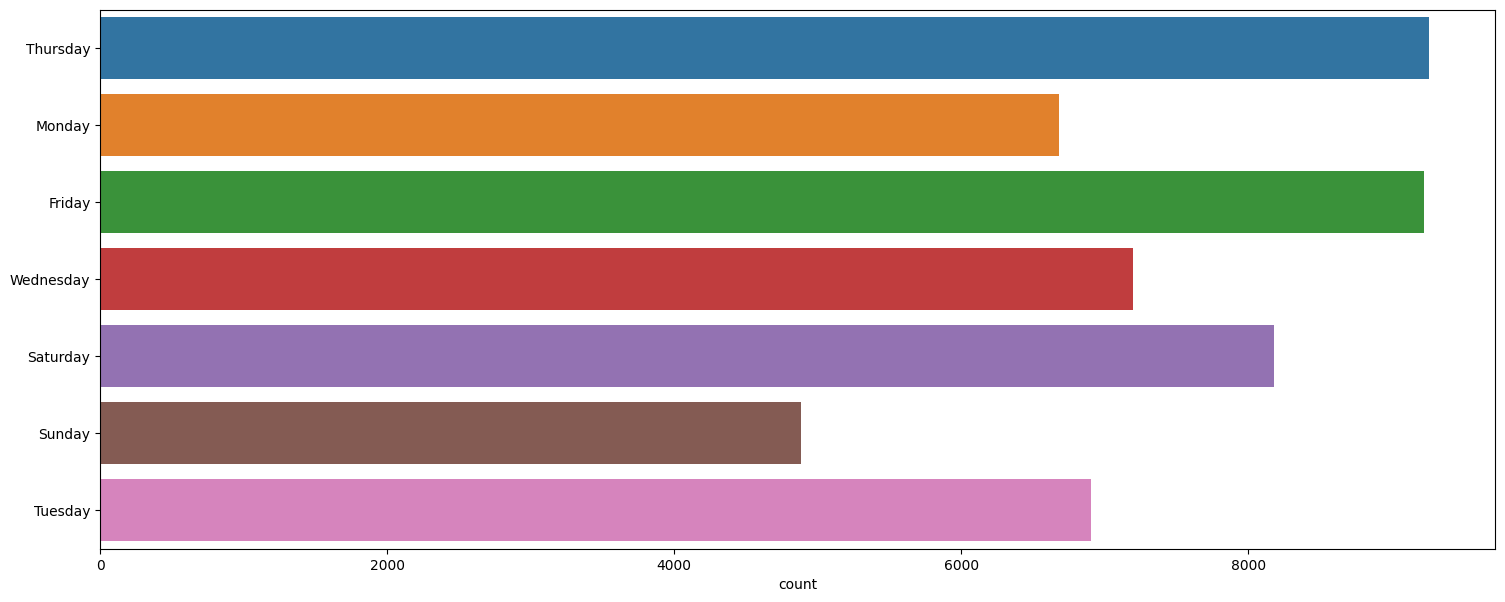

In [ ]:
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= trip_data)
plt.ylabel('');

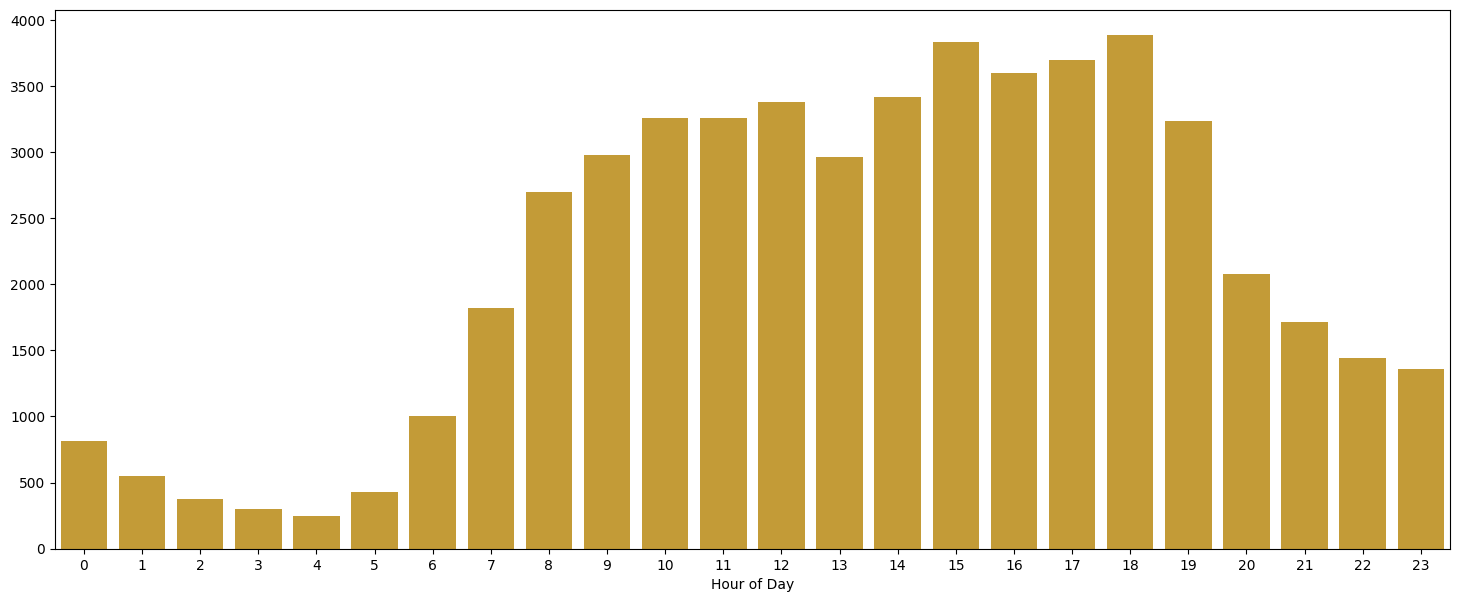

In [ ]:
plt.figure(figsize= (18, 7))
sns.countplot(x= trip_data['lpep_pickup_datetime'].dt.hour, data= trip_data, color= 'goldenrod')
plt.ylabel('')
plt.xlabel('Hour of Day');

### Question 2
**Is there any correlation between airbnb rentals count and taxi count according to the different neighbourhoods**

In [ ]:
# For the taxi data
unique_neighborhoods_taxi = trip_data['PUZone'].unique()
print("Unique Neighborhoods in Taxi Data:", unique_neighborhoods_taxi)

# For the Airbnb data
unique_neighborhoods_airbnb = airbnb_data['neighbourhood'].unique()
print("Unique Neighborhoods in Airbnb Data:", unique_neighborhoods_airbnb)


Unique Neighborhoods in Taxi Data: ['East Harlem North' 'Fort Greene' 'Central Harlem North' 'Bloomingdale'
 'East Harlem South' 'Elmhurst' 'Central Harlem' 'Morrisania/Melrose'
 'Richmond Hill' 'Astoria' 'Sunnyside' 'Mott Haven/Port Morris' 'Inwood'
 'Melrose South' 'Jamaica' 'Forest Hills' 'Kingsbridge Heights'
 'Bedford Park' 'Old Astoria' 'Hamilton Heights' 'Hunts Point'
 'Jackson Heights' 'Sunset Park East' 'Manhattan Beach'
 'Washington Heights South' 'Baisley Park' 'North Corona'
 'Bloomfield/Emerson Hill' 'Van Cortlandt Park' 'Morningside Heights'
 'Washington Heights North' 'Mount Hope' 'Ridgewood'
 'Soundview/Castle Hill' 'Highbridge' 'Central Park' 'Steinway'
 'Manhattanville' 'Queens Village' 'Norwood' 'Clinton Hill' 'Brownsville'
 'Sheepshead Bay' 'Cobble Hill' 'Briarwood/Jamaica Hills'
 'Brooklyn Heights' 'East Concourse/Concourse Village'
 'Crown Heights North' 'Oakland Gardens' 'JFK Airport' 'Fordham South'
 'Starrett City' 'Co-Op City' 'Brighton Beach' 'Bellerose' 'Kew

In [ ]:
unique_values_taxi_set = set(unique_neighborhoods_taxi)
unique_values_airbnb_set = set(unique_neighborhoods_airbnb)
common_values = unique_values_taxi_set.intersection(unique_values_airbnb_set)

# Print common values
print("Common Unique Values:", common_values)

Common Unique Values: {'Richmond Hill', 'Glen Oaks', 'Greenpoint', 'Bronxdale', 'Longwood', 'Woodhaven', 'Cambria Heights', 'Bellerose', 'West Village', 'Sunnyside', 'Cypress Hills', 'Windsor Terrace', 'Park Slope', 'Arden Heights', 'Inwood', 'Kips Bay', 'Fort Greene', 'Far Rockaway', 'Roosevelt Island', 'Mariners Harbor', 'Astoria', 'Belmont', 'Pelham Bay', 'Gowanus', 'Gravesend', 'Brooklyn Heights', 'Murray Hill', 'Queens Village', 'Manhattan Beach', 'Brighton Beach', 'Kensington', 'Flatlands', 'Norwood', 'Stapleton', 'Kew Gardens', 'Howard Beach', 'Kew Gardens Hills', 'Bay Ridge', 'Clinton Hill', 'Fresh Meadows', 'Elmhurst', 'Ozone Park', 'Whitestone', 'Bayside', 'Forest Hills', 'Red Hook', 'Glendale', 'Jackson Heights', 'Midwood', 'Maspeth', 'Morningside Heights', 'Prospect-Lefferts Gardens', 'Douglaston', 'Jamaica', 'Hollis', 'Chinatown', 'Rego Park', 'Coney Island', 'West Brighton', 'City Island', 'Carroll Gardens', 'South Ozone Park', 'Laurelton', 'Jamaica Estates', 'Highbridge'

In [ ]:
airbnb_data.head()


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                           no name  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ... Construction year  price  \
0  40.64749 -73.97237             False  ...            2020.0  $966    
1  40.75362 -73.98377             False  ...            2007.0  $142    
2  40.80902 -73.94190              True  ...            2005.0  $620    
3  40.68514 -73.95976              True  ...            2005.0  $368    
4  40.79851 -73.94399             False  ...            2009.0  $204    

   service fee minimum nights number of reviews  last review  \
0        $193            10.0               9.0   2021-10-19   
1         $28            30.0              45.0   2022-05-21   
2        $124             3.0               0.0   2019-06-23   
3         $74            30.0             270.0   2019-07-05   
4         $41            10.0               9.0   2018-11-19   

   reviews per month review rate number  calculated host listings count  \
0               0.21                4.0                             6.0   
1               0.38                4.0                             2.0   
2               0.03                5.0                             1.0   
3               4.64                4.0                             1.0   
4               0.10                3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0  

[5 rows x 22 columns]

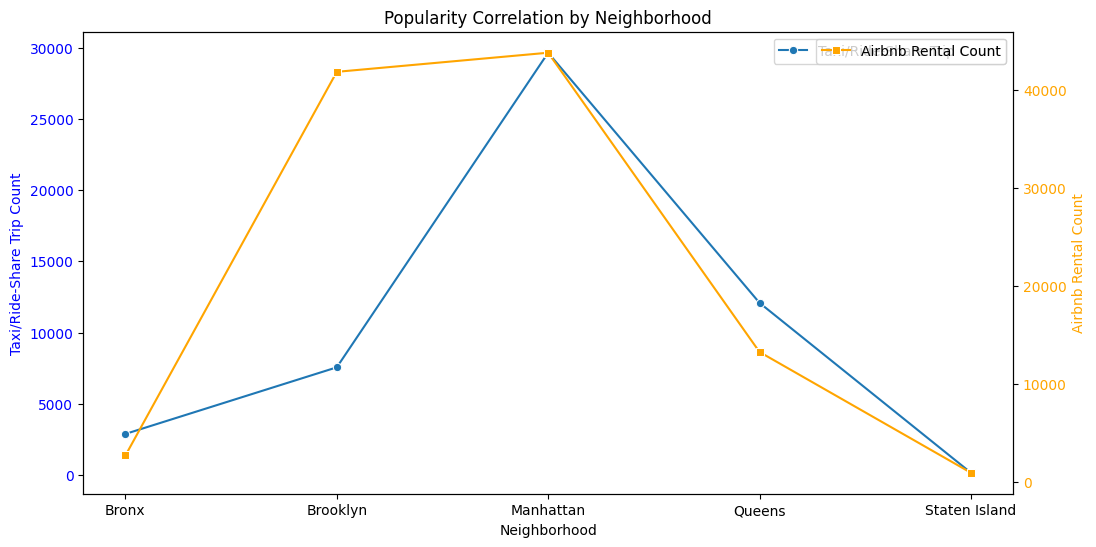

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For Taxi Data
taxi_neighbourhood_count = trip_data.groupby('PUBorough').size().reset_index(name='trip_count')

# For Airbnb Data
airbnb_neighbourhood_count = airbnb_data.groupby('neighbourhood group').size().reset_index(name='rental_count')

# Merge datasets
merged_data = pd.merge(taxi_neighbourhood_count, airbnb_neighbourhood_count, left_on='PUBorough', right_on='neighbourhood group')

# Sort the data by neighborhood for better visualization
merged_data = merged_data.sort_values(by='PUBorough')

# Plot line graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot taxi/ride-share trip count on the first y-axis
sns.lineplot(data=merged_data, x='PUBorough', y='trip_count', marker='o', ax=ax1, label='Taxi/Ride-Share Trip Count')
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Taxi/Ride-Share Trip Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot Airbnb rental count
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='PUBorough', y='rental_count', marker='s', color='orange', ax=ax2, label='Airbnb Rental Count')
ax2.set_ylabel('Airbnb Rental Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Popularity Correlation by Neighborhood')
plt.show()


From the chart, we can conclude the following:

Manhattan is the most popular neighborhood both in terms of taxi/ride-share usage and Airbnb rentals, which peaks significantly higher than the other neighborhoods. This suggests a high demand for transportation and accommodation, possibly due to tourism, business travel, and the concentration of attractions and amenities.

Brooklyn follows as the second most popular neighborhood, showing substantial activity for both transportation and rental counts, though significantly less than Manhattan.

Queens and Staten Island show lower popularity on these metrics. Queens has a moderate number of taxi/ride-share trips, but the Airbnb rental count is lower. Staten Island has the lowest counts for both metrics, indicating it is the least popular among the neighborhoods listed for both transportation and short-term rentals.

The Bronx has the least taxi/ride-share activity but is not the lowest for Airbnb rentals, suggesting that while it might not be as frequented by taxi or ride-share services, it still maintains a moderate level of attractiveness for short-term accommodation.

The trends indicate that neighborhoods traditionally considered as centers of activity (like Manhattan and Brooklyn) have higher demands for both transportation and accommodation, reflecting their popularity with visitors and possibly residents. In contrast, neighborhoods further from the city center (like Staten Island) or less commonly associated with tourism (like The Bronx) have lower demand in these services.

This kind of data can be valuable for various stakeholders, including city planners, transportation services, real estate investors, and tourism boards, as it provides insights into the distribution of services and can help with making informed decisions regarding resource allocation, marketing strategies, and infrastructure development.

### Question 3
**Which neighbourhood has the most number of airbnb rentals**

In [ ]:
import pandas as pd


# Count the number of listings in each neighbourhood
zone_counts = airbnb_data['neighbourhood'].value_counts()

# Find the zone with the most listings
most_popular_zone = zone_counts.idxmax()
most_popular_count = zone_counts.max()

print(f"The zone with the most number of rentals is {most_popular_zone} with {most_popular_count} listings.")


The zone with the most number of rentals is Bedford-Stuyvesant with 7936 listings.


In [ ]:
avg_location = airbnb_data[airbnb_data['neighbourhood'] == most_popular_zone].mean()

<ipython-input-149-75d9799ef877>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

<ipython-input-149-75d9799ef877>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
import folium

# Create a map centered around the average location
m = folium.Map(location=[avg_location['lat'], avg_location['long']], zoom_start=12)

# Add a marker for the location
folium.Marker([avg_location['lat'], avg_location['long']], popup=most_popular_zone).add_to(m)

# Display the map
m

###Question 4
**What are the high-density areas for Airbnb rentals in the city, and how do they correlate with tourist attractions, public transportation, or other amenities?**

In [ ]:
import folium
from folium.plugins import HeatMap

# Custom gradient
gradient = {
    0.0: 'blue',   # Low density
    0.4: 'cyan',
    0.6: 'lime',
    0.8: 'yellow',
    1.0: 'red'     # High density
}

# Setup map
m = folium.Map(location=[airbnb_data['lat'].mean(), airbnb_data['long'].mean()], zoom_start=12)

# Heatmap data
heat_data = [[row['lat'], row['long']] for index, row in airbnb_data.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data, gradient=gradient, radius=8, blur=10).add_to(m)

# Display the map
m


**How does the density of Airbnb rentals in different areas correlate with the pricing trends? Are more densely populated rental areas more expensive?**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming airbnb_data is your DataFrame and it has 'lat' and 'long' columns for latitude and longitude.
# Convert 'price' column to string and then to numeric
airbnb_data['price'] = pd.to_numeric(airbnb_data['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

# Approximate density by counting the number of listings in each latitude and longitude
# This is a simplified approach to demonstrate the concept
airbnb_data['count'] = airbnb_data.groupby(['lat', 'long'])['price'].transform('count')

# Create a scatter plot on a map using Plotly with size representing the count of listings
fig = px.scatter_mapbox(airbnb_data, lat="lat", lon="long", size="count", color="price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=10, zoom=10,
                        mapbox_style="carto-positron")

fig.show()


<ipython-input-178-4ad625afde1d>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In the plot, each dot represents an Airbnb listing. The size of the dots corresponds to the number of listings in that location, indicating the density of available properties. The color of the dots represents the price range, with the color scale on the right-hand side providing a reference for the price values associated with each color.

From the visualization, we can observe clusters of listings and get an idea of where higher-priced and lower-priced rentals are concentrated. For example, areas with a high density of dark green dots would be locations with a high number of expensive listings, while areas with more purple dots would indicate more affordable listings.

This kind of visualization can be very useful for both customers looking to find a place to stay and for rental owners to analyze the market competition and pricing strategies. It can also be insightful for urban studies regarding housing density and accommodation pricing in relation to city geography.

##Question 5
Is there any correlation between the pick up and drop off neighborhoods?

In [ ]:
trip_counts = trip_data.groupby(['PUBorough', 'DOBorough']).size().reset_index(name='TripCount')

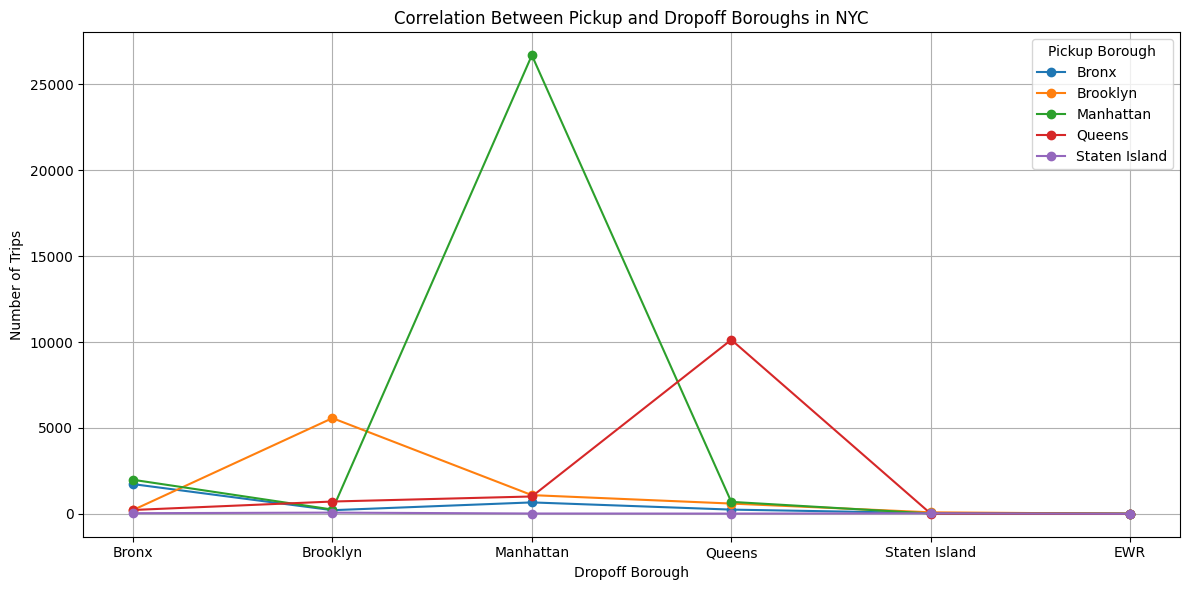

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Count the number of trips for each PUBorough-DOBorough combination
trip_counts = trip_data.groupby(['PUBorough', 'DOBorough']).size().reset_index(name='TripCount')

# Get unique boroughs for plotting
unique_puboroughs = trip_counts['PUBorough'].unique()
unique_doboroughs = trip_counts['DOBorough'].unique()

# Creating a dictionary to hold trip data for each PUBorough
borough_data = {borough: [] for borough in unique_puboroughs}
for borough in unique_puboroughs:
    for doborough in unique_doboroughs:
        trip_count = trip_counts[(trip_counts['PUBorough'] == borough) & (trip_counts['DOBorough'] == doborough)]['TripCount'].sum()
        borough_data[borough].append(trip_count)

# Plotting
plt.figure(figsize=(12, 6))
for borough, trips in borough_data.items():
    plt.plot(unique_doboroughs, trips, label=borough, marker='o')

plt.title('Correlation Between Pickup and Dropoff Boroughs in NYC')
plt.xlabel('Dropoff Borough')
plt.ylabel('Number of Trips')
plt.xticks(np.arange(len(unique_doboroughs)), unique_doboroughs)
plt.legend(title='Pickup Borough')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



Dominant Travel Patterns:

Manhattan appears to be the most significant hub for both pickups and dropoffs. This is indicated by the high peak in the graph for trips originating from Manhattan to other boroughs, suggesting a high volume of traffic moving in and out of Manhattan.
Intra-borough Connectivity:

The graph shows that the number of trips within Manhattan is significantly higher than between any other boroughs, indicating a strong intra-borough connectivity. This may suggest that residents and visitors in Manhattan tend to travel most frequently within the borough.
Inter-borough Travel:

There is a notable amount of travel from Manhattan to Brooklyn and Queens, as seen by the lines from Manhattan to these boroughs. However, the connectivity to the Bronx, Staten Island, and EWR (presumably Newark Liberty International Airport) is considerably lower.
Lesser Served Areas:

The Bronx, Staten Island, and EWR have a relatively low number of trips originating from them, suggesting these areas are either less connected by the modes of transport in the data set or there is less demand for trips from these areas.

#D4. Summary of key findings

1. After carefully analysing the trip_data we can conclude that the busiest weekday in terms of taxi trips is Thursday and the busiest hour of the day is roughly 18:00 or 6 p.m.
2. Manhattan is the most popular neighborhood both in terms of taxi/ride-share usage and Airbnb rentals.
3. The trends indicate that neighborhoods traditionally considered as centers of activity (like Manhattan and Brooklyn) have higher demands for both transportation and accommodation, reflecting their popularity with visitors and possibly residents. In contrast, neighborhoods further from the city center (like Staten Island) or less commonly associated with tourism (like The Bronx) have lower demand in these services.
4. Manhattan appears to be the most significant hub for both pickups and dropoffs.
5. The Bronx, Staten Island, and EWR have a relatively low number of trips originating from them, suggesting these areas are either less connected by the modes of transport in the data set or there is less demand for trips from these areas.

#D5. Further Research

To draw more detailed conclusions, it would be beneficial to investigate the reasons behind these patterns, such as residential and commercial distributions, tourist attractions, or cultural events.

Expand the scope to include other modes of transportation, such as public transit usage, bike-sharing services, and walking patterns. How do these modes correlate with short-term rental pattern.

How do income levels, demographic profiles, and housing density affect these trends?